In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

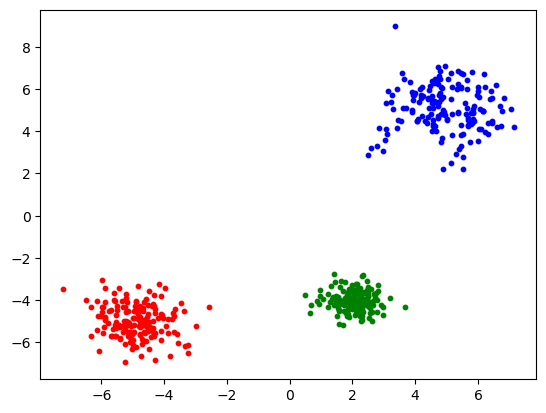

In [2]:
centers = [(-5, -5), (5, 5), (2, -4)]
cluster_std = [0.8, 1, 0.5]
k = 3

X, y = make_blobs(n_samples=500, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")

In [65]:
from collections import deque

class DBScan:
    def __init__(self, epsilon=1.0, n=10):
        self.epsilon = epsilon
        self.n = n
            
    def learn(self, X):
        n_points = X.shape[0]
        visited = np.zeros(X.shape[0])
        # randomly initializing the starting point
        index = np.random.randint(0,n_points, size=1)
        starting_point = X[index]
        print(f"Initial point: {starting_point}")
        
        queue = deque(index)
        assigned_points = []
        while visited.sum() < n_points:  # not all nodes has been assigned
            if len(queue) > 0:
                index = queue.popleft()
                visited[index] = 1
                point = X[index]
                assigned_points.append(point)
                
                dist = ((X - point)**2).sum(axis=1)
                dist *= (1-visited)
                near_neighbors = np.where((dist > 0) & (dist < self.epsilon))
                #import pdb; pdb.set_trace()
                for neighbor in near_neighbors[0].tolist():
                    queue.append(neighbor)
            else:
                if len(assigned_points) > self.n:
                    centroid = np.stack(assigned_points, axis=0).mean(axis=0)
                    print(f"Learned centroid: {centroid}")
                else:
                    print(f"Discarding too small cluster: {assigned_points}")
                assigned_points = []
                queue.append(np.where(visited==0)[0][0])

In [66]:
model = DBScan()

In [67]:
model.learn(X)

Initial point: [[6.14690038 4.95029742]]
Learned centroid: [3.52124043 4.67283618]
Learned centroid: [ 2.41063648 -4.09503207]
Learned centroid: [-5.53864277 -4.82372238]


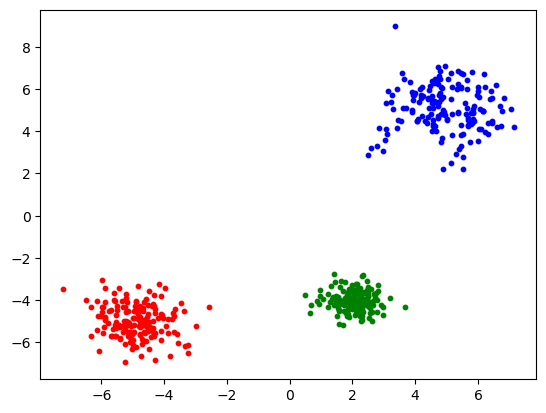

In [68]:
centers = [(-5, -5), (5, 5), (2, -4)]
cluster_std = [0.8, 1, 0.5]
k = 3

X, y = make_blobs(n_samples=500, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")